# *** AI based Personal Finance Advisor ***

# This project is an AI-powered personal finance advisor that helps users analyze their spending habits, forecast future expenses, and receive personalized financial recommendations. It combines exploratory data analysis, machine learning, and intelligent insights to guide smarter budgeting decisions.

# Combining All three csv files -

In [4]:
import pandas as pd
import glob
import os

path = "D://C folder Data//B.Sc. Data Science Symbiosis//Final Year Projects//AI Personal Finance//archive"

all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

print("Combined shape:", df.shape)
print(df.head(10))
print(df.columns)

Combined shape: (12641, 3)
                        date    category  amount
0  2022-07-06 05:57:10 +0000  Restuarant    5.50
1  2022-07-06 05:57:27 +0000      Market    2.00
2  2022-07-06 05:58:12 +0000       Coffe   30.10
3  2022-07-06 05:58:25 +0000      Market   17.33
4  2022-07-06 05:59:00 +0000  Restuarant    5.50
5  2022-07-06 05:59:15 +0000      Market   11.78
6  2022-07-06 05:59:41 +0000  Restuarant   10.00
7  2022-07-06 05:59:44 +0000      Market    1.38
8  2022-07-06 05:59:45 +0000  Restuarant   10.00
9  2022-07-06 05:59:56 +0000      Market    2.73
Index(['date', 'category', 'amount'], dtype='object')


# Clean the combined Dataset -

In [7]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Remove nulls and duplicates
df = df.dropna().drop_duplicates()

# Standardize category names (fix typos like "Coffe")
df['category'] = df['category'].str.strip().str.title()
df['category'] = df['category'].replace({'Coffe': 'Coffee'})

# Convert amount to numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

print(df.info())
print(df['category'].value_counts().head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597 entries, 0 to 4596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      4597 non-null   datetime64[ns, UTC]
 1   category  4597 non-null   object             
 2   amount    4597 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 143.7+ KB
None
Coffee            1248
Market            1142
Restuarant         538
Transport          518
Business Lunch     300
Taxi               237
Phone              141
Learning            99
Other               98
Events              51
Name: category, dtype: int64


In [9]:
df.to_csv("cleaned_budget_data.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


# Exploratory Data Analysis for Cleaned Data - 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D://C folder Data//B.Sc. Data Science Symbiosis//Final Year Projects//AI Personal Finance//archive//cleaned_budget_data.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create new time-related columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()

df.head()

,date,category,amount,year,month,day,weekday
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,2022,July,6,Wednesday
1,2022-07-06 05:57:27+00:00,Market,2.00,2022,July,6,Wednesday
2,2022-07-06 05:58:12+00:00,Coffee,30.10,2022,July,6,Wednesday
3,2022-07-06 05:58:25+00:00,Market,17.33,2022,July,6,Wednesday
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,2022,July,6,Wednesday


In [37]:
# Summary Statistics -

print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

Dataset Shape: (4597, 7)

Missing Values:
 date        0
category    0
amount      0
year        0
month       0
day         0
weekday     0
dtype: int64

Data Types:
 date        datetime64[ns, UTC]
category                 object
amount                  float64
year                      int64
month                    object
day                       int64
weekday                  object
dtype: object

Summary Statistics:
             amount         year          day
count  4597.000000  4597.000000  4597.000000
mean     15.591100  2023.390037    15.492713
std      75.778464     0.863089     8.844624
min       0.050000  2022.000000     1.000000
25%       4.000000  2023.000000     8.000000
50%       7.100000  2023.000000    15.000000
75%      11.500000  2024.000000    23.000000
max    2500.000000  2025.000000    31.000000


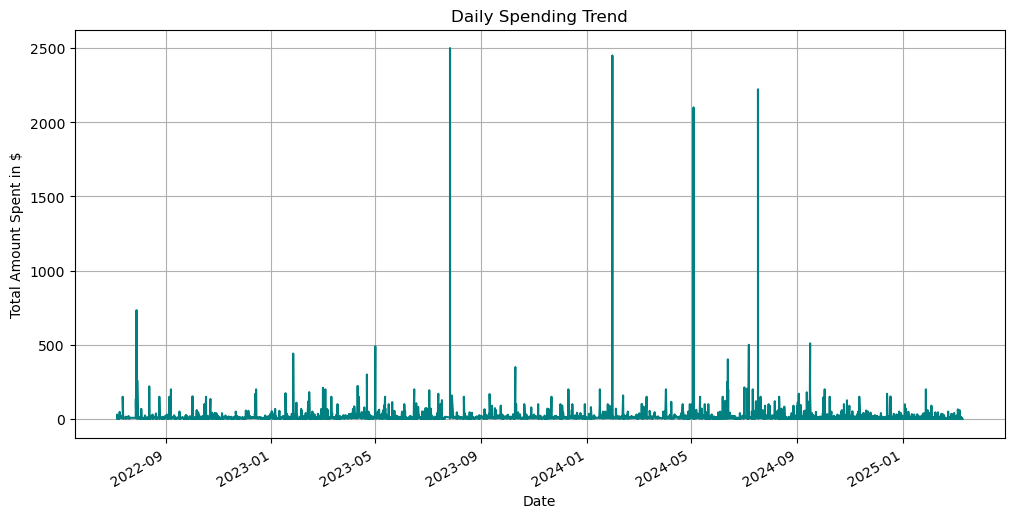

In [34]:
# User Spending Trend Over Time -

plt.figure(figsize=(12,6))
df.groupby('date')['amount'].sum().plot(color='teal')
plt.title("Daily Spending Trend")
plt.xlabel("Date")
plt.ylabel("Total Amount Spent in $")
plt.grid(True)
plt.show()

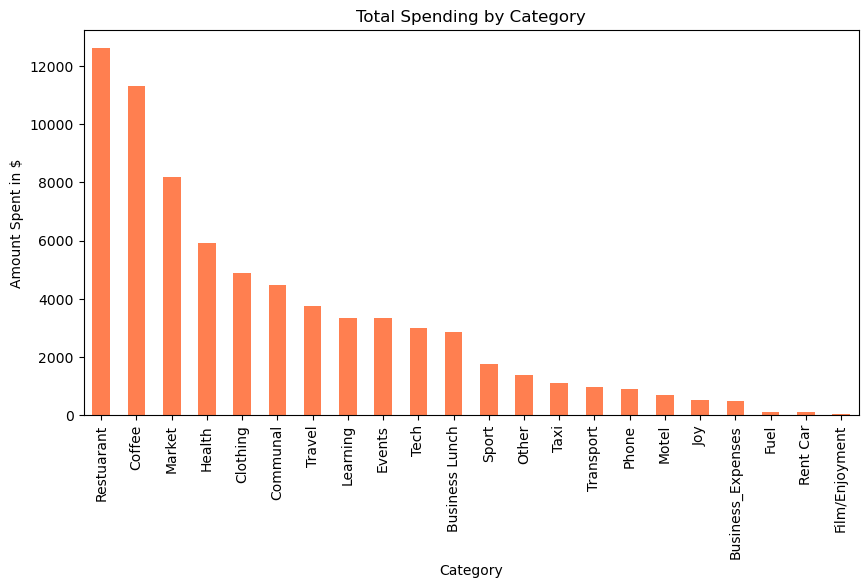

In [39]:
# Total Spending by each Category -

plt.figure(figsize=(10,5))
df.groupby('category')['amount'].sum().sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title("Total Spending by Category")
plt.xlabel("Category")
plt.ylabel("Amount Spent in $")
plt.show()

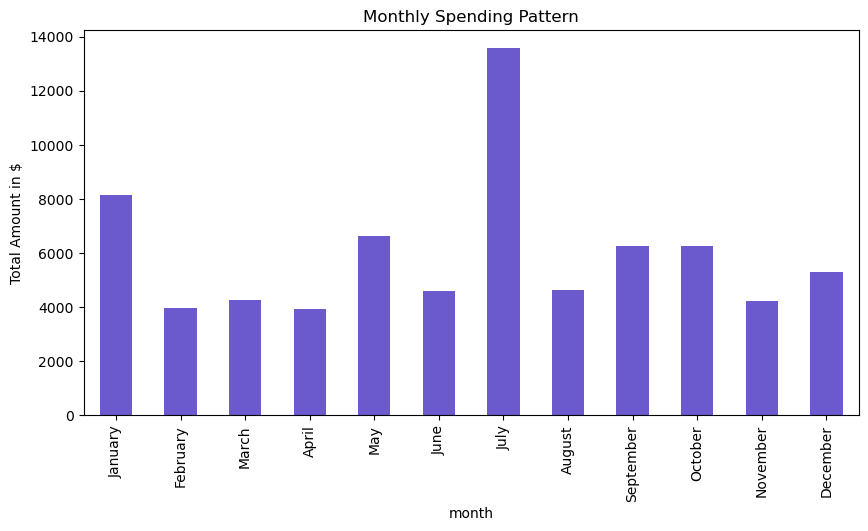

In [30]:
# User Spending by Month-

monthly_spend = df.groupby('month')['amount'].sum().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.figure(figsize=(10,5))
monthly_spend.plot(kind='bar', color='slateblue')
plt.title("Monthly Spending Pattern")
plt.ylabel("Total Amount in $")
plt.show()

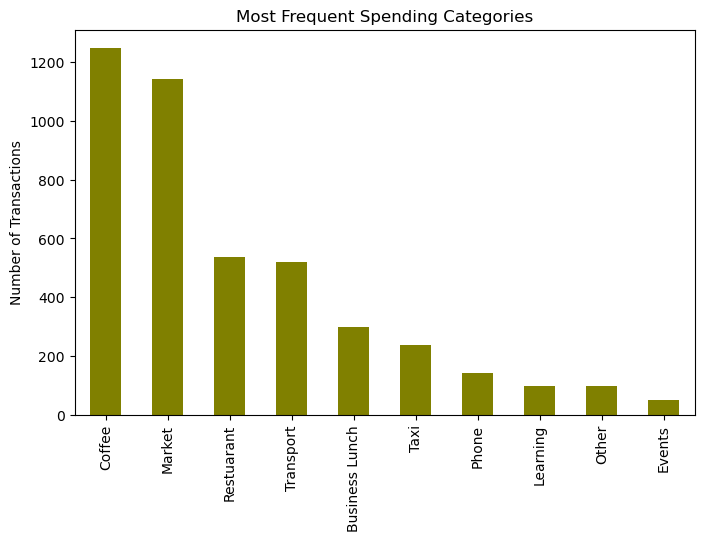

In [41]:
# Most frequent Spending Categories - 

plt.figure(figsize=(8,5))
df['category'].value_counts().head(10).plot(kind='bar', color='olive')
plt.title("Most Frequent Spending Categories")
plt.ylabel("Number of Transactions")
plt.show()

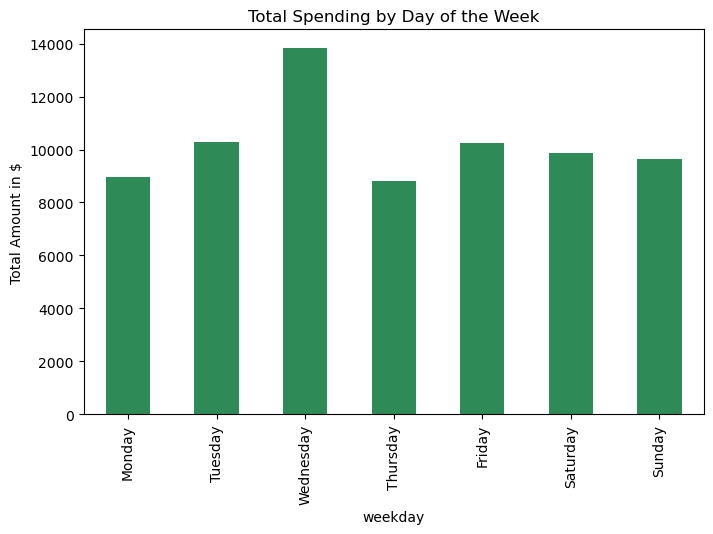

In [45]:
# User weekday Spending pattern -

plt.figure(figsize=(8,5))
df.groupby('weekday')['amount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', color='seagreen')
plt.title("Total Spending by Day of the Week")
plt.ylabel("Total Amount in $")
plt.show()

In [47]:
# Dataset key Insights Summary -
insights = {}

# Highest spending category
insights['top_category'] = df.groupby('category')['amount'].sum().idxmax()

# Lowest spending category
insights['lowest_category'] = df.groupby('category')['amount'].sum().idxmin()

# Month with maximum spending
insights['max_spend_month'] = df.groupby('month')['amount'].sum().idxmax()

# Average daily spending
insights['avg_daily_spend'] = round(df.groupby('date')['amount'].sum().mean(), 2)

# Day with most spending
insights['max_spend_day'] = df.groupby('weekday')['amount'].sum().idxmax()

print("AI Finance Advisor - Spending Insights")
for k, v in insights.items():
    print(f"{k.replace('_',' ').title()}: {v}")

AI Finance Advisor - Spending Insights
Top Category: Restuarant
Lowest Category: Film/Enjoyment
Max Spend Month: July
Avg Daily Spend: 15.59
Max Spend Day: Wednesday


# Feature Engineering, Model Training & Feature Importance - 

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv(r"D://C folder Data//B.Sc. Data Science Symbiosis//Final Year Projects//AI Personal Finance//archive//cleaned_budget_data.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday  # Monday=0, Sunday=6

# Encode category column
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

# Create target variable (amount) and features
X = df[['year', 'month', 'day', 'weekday', 'category_encoded']]
y = df['amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (3677, 5)
Testing data: (920, 5)


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Model Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Random Forest Regressor Model Performance:
Mean Absolute Error: 10.57
Mean Squared Error: 1147.25
R² Score: 0.18


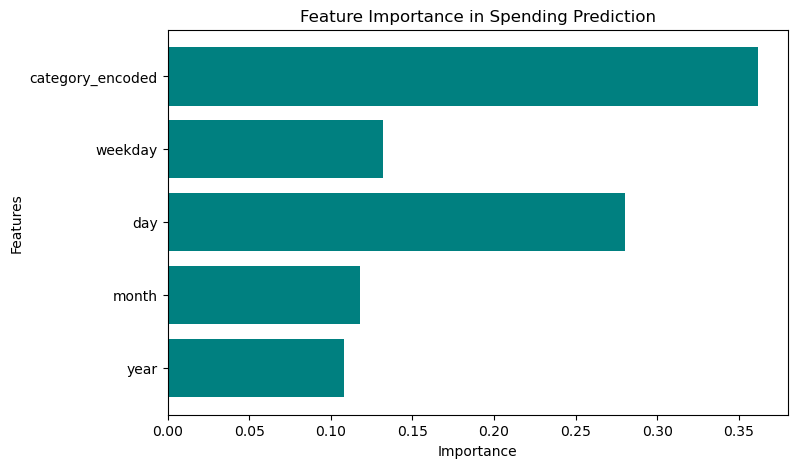

In [55]:
import matplotlib.pyplot as plt
import numpy as np

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importance, color='teal')
plt.title("Feature Importance in Spending Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show() 

# AI-driven personalized Financial Insight generation -

In [60]:
def generate_financial_advice(df, model):
    advice = []
    
    avg_spend = df['amount'].mean()
    top_category = df.groupby('category')['amount'].sum().idxmax()
    max_spend_day = df.groupby('weekday')['amount'].sum().idxmax()
    
    advice.append(f"Your average daily spending is ${avg_spend:.2f}. Try setting a target 10% below this to save more.")
    advice.append(f"You spend the most on '{top_category}'. Consider reviewing if these expenses are essential.")
    advice.append(f"You tend to spend more on {['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'][max_spend_day]}. Try planning expenses earlier in the week.")
    
    # Predict next week's expected spending
    future_data = pd.DataFrame({
        'year': [2025]*7,
        'month': [10]*7,
        'day': list(range(28,35)),
        'weekday': list(range(0,7)),
        'category_encoded': [le.transform([top_category])[0]]*7
    })
    future_pred = model.predict(future_data)
    avg_future = np.mean(future_pred)
    
    advice.append(f"Based on your current trend, you might spend around ${avg_future:.2f} next week.")
    
    return advice

advice_list = generate_financial_advice(df, model)
print("\nAI-Powered Financial Advice:\n")
for a in advice_list:
    print("-", a)


AI-Powered Financial Advice:

- Your average daily spending is $15.59. Try setting a target 10% below this to save more.
- You spend the most on 'Restuarant'. Consider reviewing if these expenses are essential.
- You tend to spend more on Wednesday. Try planning expenses earlier in the week.
- Based on your current trend, you might spend around $27.50 next week.
